In [12]:
# Transaction Volume Forecasting for Fintech/E-commerce Platforms
# Business case: Predict daily transaction volumes for infrastructure scaling,
# fraud detection resource allocation, and cash flow management

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.cloud import bigquery, storage

# Configuration
PROJECT_ID = "transaction-forecast-mlops"
BUCKET_NAME = "transaction-forecast-data"
DATASET_NAME = "transaction_data"

print(f"Project: {PROJECT_ID}")
print(f"Bucket: {BUCKET_NAME}")
print("\nBusiness Applications:")
print("- Server capacity planning (auto-scaling)")
print("- Fraud detection resource allocation")
print("- Cash reserve management")
print("- Staff scheduling optimization")

Project: transaction-forecast-mlops
Bucket: transaction-forecast-data

Business Applications:
- Server capacity planning (auto-scaling)
- Fraud detection resource allocation
- Cash reserve management
- Staff scheduling optimization


In [13]:
# Load the orders data
df = pd.read_csv(f'gs://{BUCKET_NAME}/raw_data/olist_orders_dataset.csv')

print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nColumn info:")
print(df.info())
print("\nDate range:")
print(f"From: {df['order_purchase_timestamp'].min()}")
print(f"To: {df['order_purchase_timestamp'].max()}")

Dataset shape: (99441, 8)

First few rows:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1    

Date range: 2016-09-04 00:00:00 to 2018-10-17 00:00:00
Total days: 634

Daily statistics:
count     634.000000
mean      156.847003
std        94.224817
min         1.000000
25%        96.000000
50%       148.000000
75%       215.750000
max      1176.000000
Name: transaction_volume, dtype: float64


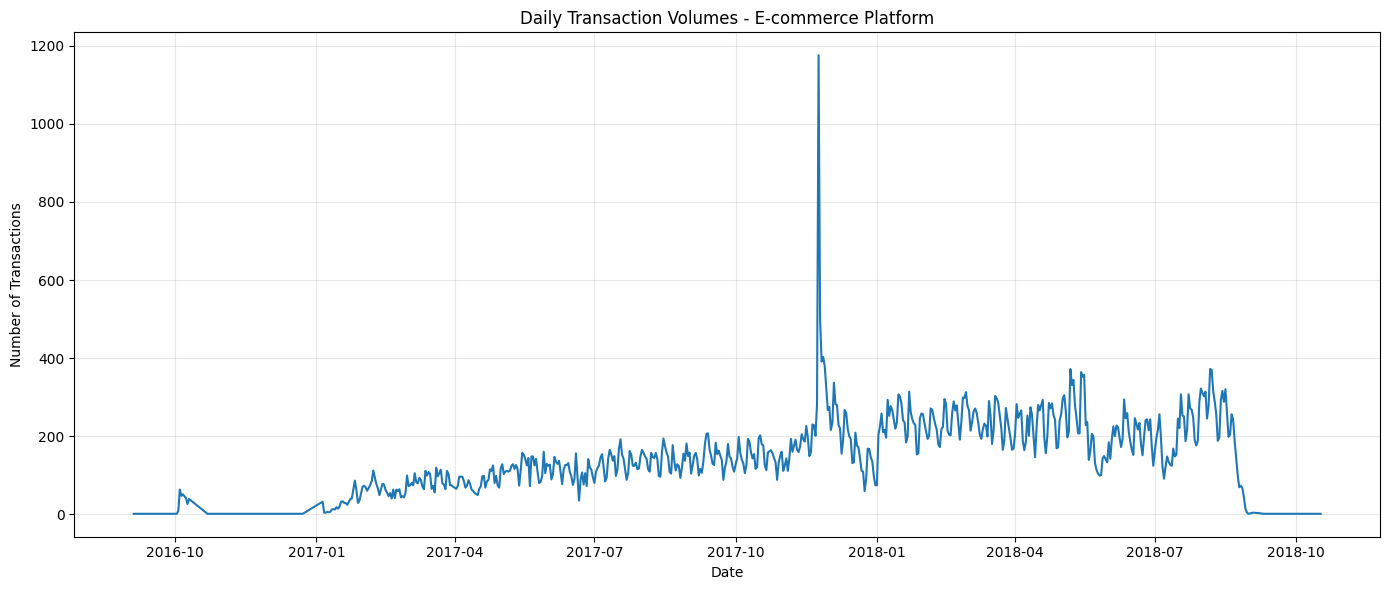

,date,transaction_volume
0,2016-09-04,1
1,2016-09-05,1
2,2016-09-13,1
3,2016-09-15,1
4,2016-10-02,1
5,2016-10-03,8
6,2016-10-04,63
7,2016-10-05,47
8,2016-10-06,51
9,2016-10-07,46


In [14]:
# Convert timestamp to datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Aggregate to daily transaction volumes
daily_volumes = df.groupby(df['order_purchase_timestamp'].dt.date).size().reset_index()
daily_volumes.columns = ['date', 'transaction_volume']
daily_volumes['date'] = pd.to_datetime(daily_volumes['date'])

print(f"Date range: {daily_volumes['date'].min()} to {daily_volumes['date'].max()}")
print(f"Total days: {len(daily_volumes)}")
print(f"\nDaily statistics:")
print(daily_volumes['transaction_volume'].describe())

# Visualize
plt.figure(figsize=(14, 6))
plt.plot(daily_volumes['date'], daily_volumes['transaction_volume'])
plt.title('Daily Transaction Volumes - E-commerce Platform')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

daily_volumes.head(10)

In [15]:
# Remove shutdown period - keep only healthy operation
cutoff_date = '2018-08-22'
daily_volumes_clean = daily_volumes[daily_volumes['date'] <= cutoff_date].copy()

print(f"Original data: {len(daily_volumes)} days")
print(f"Clean data: {len(daily_volumes_clean)} days")
print(f"Removed: {len(daily_volumes) - len(daily_volumes_clean)} days")
print(f"\nClean data range: {daily_volumes_clean['date'].min()} to {daily_volumes_clean['date'].max()}")
print(f"Average daily volume: {daily_volumes_clean['transaction_volume'].mean():.1f}")

# Save clean data
daily_volumes_clean.to_csv(f'gs://{BUCKET_NAME}/processed_data/daily_volumes_clean.csv', index=False)
print(f"\n✓ Saved clean data")

Original data: 634 days
Clean data: 610 days
Removed: 24 days

Clean data range: 2016-09-04 00:00:00 to 2018-08-22 00:00:00
Average daily volume: 162.1

✓ Saved clean data
